# SMOTE

Tạo mẫu mới bằng phép ngoại suy các mẫu của lớp thiểu số và bất kỳ k neighbour gần nhất nào của nó (cũng từ lớp thiểu số). k thường là 5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [2]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

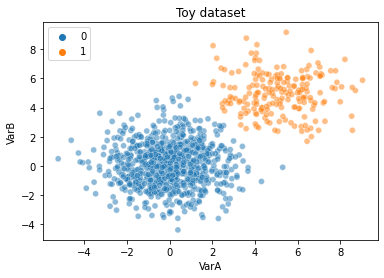

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## SMOTE

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [4]:
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
sm = SMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

</details>

In [5]:
# kích thước dữ liệu ban đầun đầun đầun đầun đầu

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [7]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 2
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

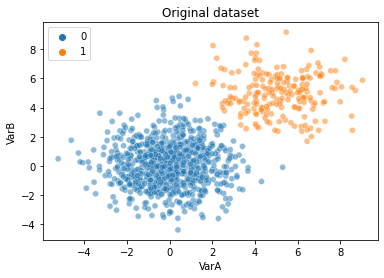

In [8]:
# biểu đồ dữ liệu ban đầu

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

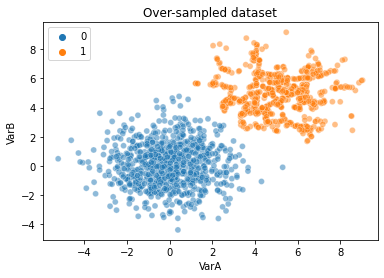

In [9]:
# biểu đồ dữ liệu đã chọn

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

Các quan sát mới khác với các quan sát ban đầu.

**BÀI TẬP**

- Kiểm tra SMOTE trong một tập dữ liệu từ imbalanced-learn và tạo một số biểu đồ của các biến làm nổi bật lớp thiểu số để hiển thị kết quả tốt hơn.

- Thay đổi tham số strategy và k_neighbor ở notebook hiện tại để thu được các tỷ lệ khác nhau của lớp thiểu số và các mẫu mới khác, khám phá phân phối của chúng.

Text(0.5, 1.0, 'Over-sampled dataset')

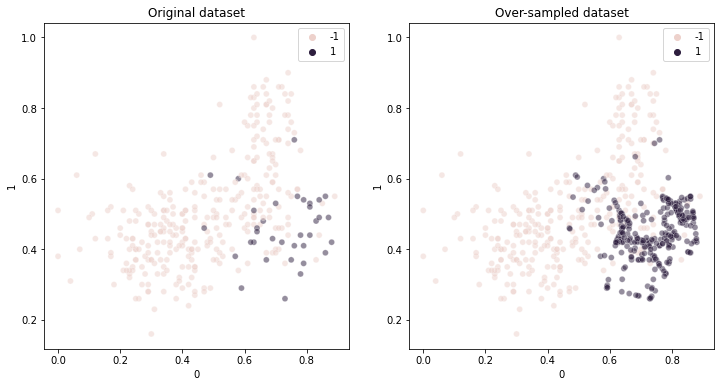

In [10]:
from imblearn.datasets import fetch_datasets

dataset_name = 'ecoli'
data = fetch_datasets()[dataset_name]
X = data.data
y = data.target

X = pd.DataFrame(X)
y = pd.Series(y)

sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=None)
X_res, y_res = sm.fit_resample(X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax0 = sns.scatterplot(data=X, x=0, y=1, hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_res, x=0, y=1, hue=y_res, ax=ax[1], alpha=0.5)
ax1.set_title('Over-sampled dataset')


Class minority: -1    301
 1    301
dtype: int64
Class not minority: -1    301
 1    301
dtype: int64
Class all: -1    301
 1    301
dtype: int64
Class auto: -1    301
 1    301
dtype: int64
Class not majority: -1    301
 1    301
dtype: int64


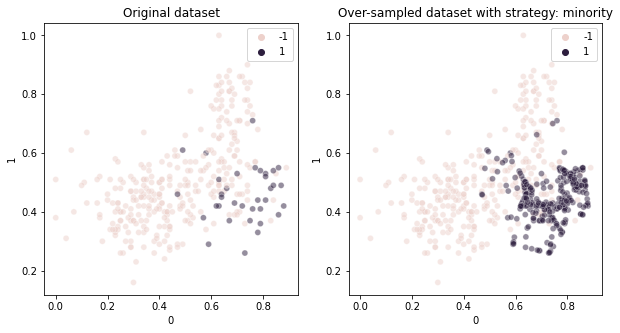

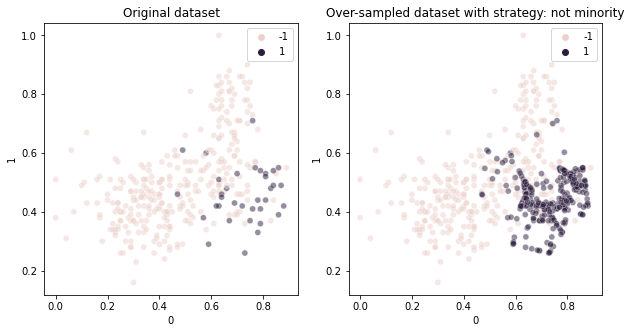

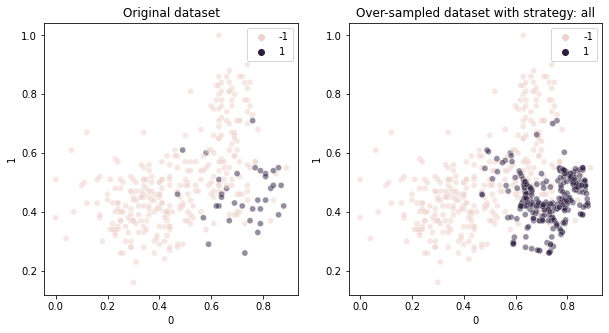

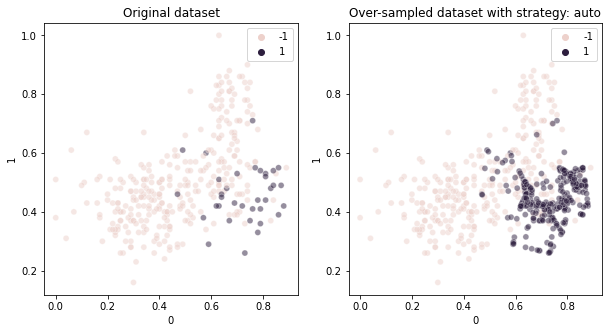

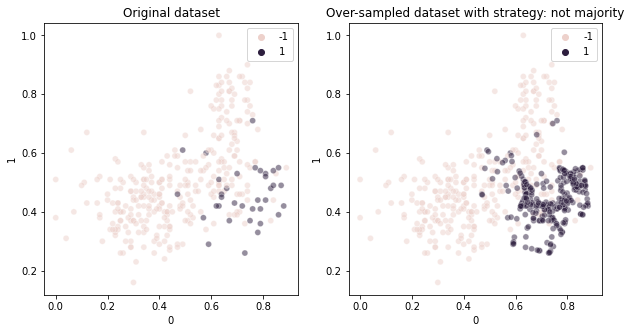

In [11]:
strategies = ['minority', 'not minority', 'all', 'auto', 'not majority']

for strategy in strategies:
    sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=None)
    X_res, y_res = sm.fit_resample(X, y)
    print(f'Class {strategy}: {y_res.value_counts()}')
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax0 = sns.scatterplot(data=X, x=0, y=1, hue=y, ax=ax[0], alpha=0.5)
    ax0.set_title('Original dataset')
    ax1 = sns.scatterplot(data=X_res, x=0, y=1, hue=y_res, ax=ax[1], alpha=0.5)
    ax1.set_title('Over-sampled dataset with strategy: {}'.format(strategy))

# SMOTE-NC

Mở rộng chức năng của SMOTE tới các biến hạng mục.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTENC

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [13]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
## Yêu cầu 3
## VIẾT CODE Ở ĐÂY:
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# thêm các đặc trưng hạng mục
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 4), (1000,))

<details><summary> Gợi ý </summary>

Sử dụng ```make_blobs()```

</details>

In [14]:
X.head()

,VarA,VarB,VarC,VarD
4,1.374210,0.409230,A,Blue
5,-3.333691,-0.711660,A,Green
7,1.203613,2.470898,B,Blue
9,3.665250,1.225743,C,Red
13,1.983755,-3.362300,C,Blue


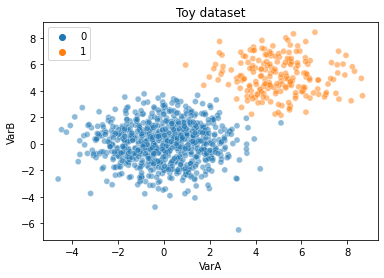

In [15]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

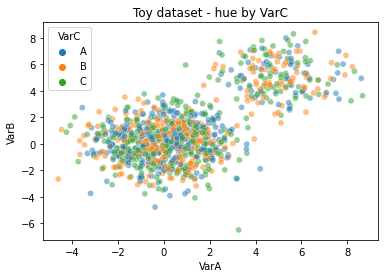

In [16]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarC', alpha=0.5
)

plt.title('Toy dataset - hue by VarC')
plt.show()

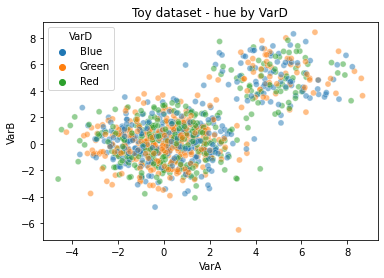

In [17]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarD', alpha=0.5
)

plt.title('Toy dataset - hue by VarD')
plt.show()

## SMOTE-NC

[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [18]:
## Yêu cầu 4
## VIẾT CODE Ở ĐÂY:
smnc = SMOTENC(
    sampling_strategy='auto', # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=4,
    categorical_features=[2,3] # chỉ số của cột có các biến hạng mục
)  

X_res, y_res = smnc.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SMOTENC()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

</details>

In [19]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 4), (1000,))

In [20]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 4), (1600,))

In [21]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 5
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

In [22]:
X.tail()

,VarA,VarB,VarC,VarD
204,3.353847,6.925626,B,Green
1309,2.579664,5.848881,B,Red
399,4.617297,6.025441,C,Red
1581,4.031669,4.501932,B,Blue
1118,4.248503,5.145699,C,Red


In [23]:
X_res.tail()

,VarA,VarB,VarC,VarD
1595,5.376482,6.918827,B,Red
1596,7.327036,5.491763,A,Red
1597,4.915493,5.674650,B,Blue
1598,2.407468,6.825184,C,Blue
1599,4.456771,4.458893,B,Green


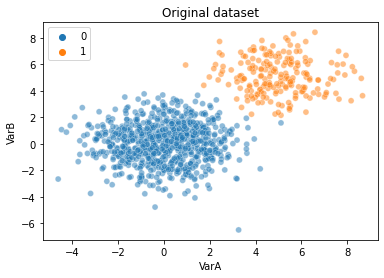

In [24]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 6
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

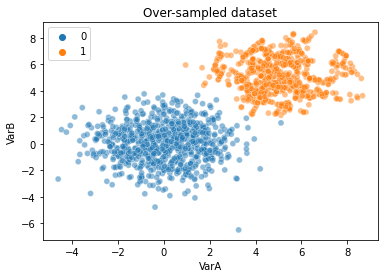

In [25]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 7
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

Các quan sát mới khác với các quan sát ban đầu.

**BÀI TẬP**

- Kiểm tra SMOTENC trong một tập dữ liệu của riêng bạn có cả biến dạng số và biến hạng mục. Hãy xem liệu nó có cải thiện chất lượng mô hình không.

- Nếu không có cải thiện gì, hãy thử với strategy và số lượng neighbour.

In [26]:
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser

df_advance = pd.read_csv('weatherAUS_advance.csv')
df_advance['RainTomorrow'] = df_advance['RainTomorrow'].fillna('Unknown')

X = df_advance.drop(['RainTomorrow'], axis=1)
y = df_advance['RainTomorrow']

#Handle date
X['Date'] = pd.to_datetime(X['Date'])
X['day'] = X['Date'].dt.day
X['month'] = X['Date'].dt.month
X['year'] = X['Date'].dt.year
X.drop(['Date'], axis=1, inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Handle missing data
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
imputer = MeanMedianImputer(imputation_method='median')
imputer.fit(X_train[num_cols])
X_train[num_cols] = imputer.transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

cate_cols = X_train.select_dtypes(include=['object']).columns.to_list()
imputer = CategoricalImputer(imputation_method='frequent')
imputer.fit(X_train[cate_cols])
X_train[cate_cols] = imputer.transform(X_train[cate_cols])
X_test[cate_cols] = imputer.transform(X_test[cate_cols])

#handle outliers
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)
    
# Encoding for target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Binary encoding for RainToday
encoder = BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Discretization for Numercial features
disc = EqualFrequencyDiscretiser(q=10, variables=num_cols)
disc.fit(X_train[num_cols])
X_train[num_cols] = disc.transform(X_train[num_cols])
X_test[num_cols] = disc.transform(X_test[num_cols])

X_train_preprocessed = X_train.copy()
y_train_preprocessed = y_train.copy()
X_test_preprocessed = X_test.copy()
y_test_preprocessed = y_test.copy()

**Khi không có xử lý dữ liệu bất cân bằng**

In [27]:
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier

cate_cols = X_train.select_dtypes(include=['object']).columns.to_list()
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=cate_cols,
    drop_last=False)
ohe_enc.fit(X_train)
X_train_encode = ohe_enc.transform(X_train)
X_test_endcode = ohe_enc.transform(X_test)

scaler = StandardScaler()
X_train_encode = scaler.fit_transform(X_train_encode)
X_test_endcode = scaler.transform(X_test_endcode)

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5, n_jobs=None)
rf.fit(X_train_encode, y_train)

print("Train")
print("F1 score:", f1_score(y_train, rf.predict(X_train_encode), average='weighted'))
print("Test")
print("F1 score:", f1_score(y_test, rf.predict(X_test_endcode), average='weighted'))

Train
F1 score: 0.7558906578332448
Test
F1 score: 0.7528146439147102


**Khi sử lý dữ liệu mất cân bằng dùng SMOTE-NC**

In [28]:
X_train_preprocessed.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,day,month,year
22926,NorfolkIsland,8,5,0,3,2,ESE,8,ESE,ESE,...,3,2,3,7,5,0,1,3,1,5
80735,Watsonia,3,5,0,0,4,NE,7,NNW,NNE,...,4,2,2,3,6,0,1,1,7,7
121764,Perth,4,4,1,0,3,SW,0,N,SW,...,4,0,1,4,5,1,0,9,5,2
139821,Darwin,8,8,0,5,4,ESE,6,ESE,E,...,2,0,0,8,8,0,1,3,4,1
1867,Albury,6,2,2,2,2,E,0,ESE,E,...,2,4,4,4,2,1,0,2,2,5


In [29]:
cate_cols = X_train_preprocessed.select_dtypes(include=['object']).columns.to_list()
smnc = SMOTENC(sampling_strategy='auto', 
               random_state=0, 
               categorical_features=[X_train_preprocessed.columns.get_loc(c) for c in cate_cols if c in X_train_preprocessed],
               k_neighbors=5)
X_res, y_res = smnc.fit_resample(X_train_preprocessed, y_train_preprocessed)

In [30]:
pd.Series(y_res).value_counts(), pd.Series(y_train_preprocessed).value_counts()

(0    88234
 1    88234
 2    88234
 dtype: int64,
 0    88234
 2    25511
 1     2623
 dtype: int64)

In [31]:
X_res = pd.DataFrame(X_res, columns=X_train_preprocessed.columns)
X_res.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,day,month,year
0,NorfolkIsland,8,5,0,3,2,ESE,8,ESE,ESE,...,3,2,3,7,5,0,1,3,1,5
1,Watsonia,3,5,0,0,4,NE,7,NNW,NNE,...,4,2,2,3,6,0,1,1,7,7
2,Perth,4,4,1,0,3,SW,0,N,SW,...,4,0,1,4,5,1,0,9,5,2
3,Darwin,8,8,0,5,4,ESE,6,ESE,E,...,2,0,0,8,8,0,1,3,4,1
4,Albury,6,2,2,2,2,E,0,ESE,E,...,2,4,4,4,2,1,0,2,2,5


In [32]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=cate_cols,
    drop_last=False)
ohe_enc.fit(X_res)
X_train_encode = ohe_enc.transform(X_res)
X_test_endcode = ohe_enc.transform(X_test)

scaler = StandardScaler()
X_train_encode = scaler.fit_transform(X_train_encode)
X_test_endcode = scaler.transform(X_test_endcode)

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5, n_jobs=None)
rf.fit(X_train_encode, y_res)

print("Train")
print("F1 score:", f1_score(y_res, rf.predict(X_train_encode), average='weighted'))
print("Test")
print("F1 score:", f1_score(y_test, rf.predict(X_test_endcode), average='weighted'))

Train
F1 score: 0.7156346544653832
Test
F1 score: 0.7333009274972742


<span style="color:red">Chất lượng mô hình giảm</span>.

**Thay đổi sampling strategy và số lượng neighbour**

In [33]:
strategies = ['minority', 'not minority', 'all', 'auto', 'not majority']
k_neighbour = [4,5,6]
count = 0
results_dict = {}
for strategy in strategies:
    for neighbour in k_neighbour:
        smnc = SMOTENC(sampling_strategy=strategy, 
                   random_state=0, 
                   categorical_features=[X_train_preprocessed.columns.get_loc(c) for c in cate_cols if c in X_train_preprocessed],
                   k_neighbors=neighbour)
        X_res, y_res = smnc.fit_resample(X_train_preprocessed, y_train_preprocessed)
        ohe_enc = OneHotEncoder(
            top_categories=None,
            variables=cate_cols,
            drop_last=False)
        ohe_enc.fit(X_res)
        X_train_encode = ohe_enc.transform(X_res)
        X_test_endcode = ohe_enc.transform(X_test)
        scaler = StandardScaler()
        X_train_encode = scaler.fit_transform(X_train_encode)
        X_test_endcode = scaler.transform(X_test_endcode)
        rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5, n_jobs=None)
        rf.fit(X_train_encode, y_res)
        key = strategy + '_' + str(neighbour)+'_neighbour'
        results_dict[key] = f1_score(y_test, rf.predict(X_test_endcode), average='weighted')
        count += 1
        print('{} out of {} done'.format(count, len(strategies)*len(k_neighbour)))

1 out of 15 done
2 out of 15 done
3 out of 15 done
4 out of 15 done
5 out of 15 done
6 out of 15 done
7 out of 15 done
8 out of 15 done
9 out of 15 done
10 out of 15 done
11 out of 15 done
12 out of 15 done
13 out of 15 done
14 out of 15 done
15 out of 15 done


<AxesSubplot:>

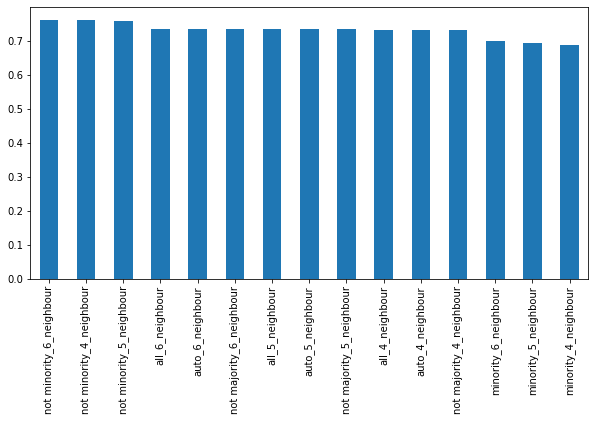

In [34]:
pd.Series(results_dict).sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [35]:
pd.Series(results_dict).max()

0.7612439861145976

In [36]:
max(results_dict, key=results_dict.get)

'not minority_6_neighbour'

<span style="color:red">Vậy vơi strategy: 'not minority' and 6 neighbour sẽ cho chất lượng mô hình tốt nhất trên tập test (F1_score = 0.76124) </span>.

# SMOTE đường biên (BorderlineSMOTE)

Tạo mẫu mới bằng cách nội suy mẫu của lớp đa số và các neighbour gần nhất của nó. Nó không sử dụng toàn bộ quan sát của lớp thiểu số làm khuôn mẫu giống như SMOTE, mà trước tiên nó sẽ chọn các quan sát có phần lớn neighbour thuộc lớp đa số rồi dùng chúng làm khuôn mẫu để tạo dữ liệu tổng hợp.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import BorderlineSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [38]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
## Yêu cầu 8
## VIẾT CODE Ở ĐÂY:
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

<details><summary> Gợi ý </summary>

Sử dụng ```make_blobs()```

</details>

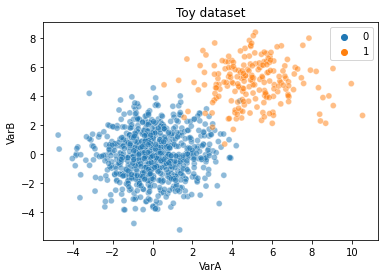

In [39]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## BorderlineSMOTE

[BorderlineSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

In [40]:
## Yêu cầu 9
## VIẾT CODE Ở ĐÂY:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[BorderlineSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

</details>

In [41]:
## Yêu cầu 10
## VIẾT CODE Ở ĐÂY:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[BorderlineSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

</details>

In [42]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [43]:
# kích thước dữ liệu undersampled

X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [44]:
# kích thước dữ liệu undersampled

X_res_b2.shape, y_res_b2.shape

((1599, 2), (1599,))

In [45]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 11
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64,
 0    800
 1    799
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

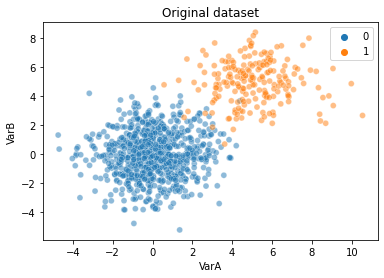

In [46]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 12
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

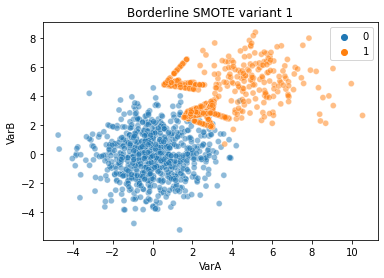

In [47]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 13
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res_b1, x="VarA", y="VarB", hue=y_res_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

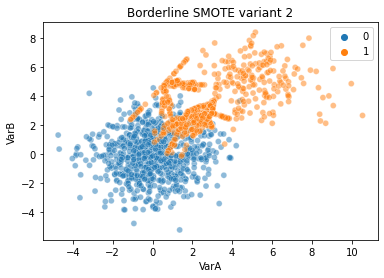

In [48]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 14
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res_b2, x="VarA", y="VarB", hue=y_res_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()

Chúng ta thấy rằng nếu sử dụng variant 2 thì chúng ta sẽ tạo ra nhiều dữ liệu tổng hợp hơn hướng tới lớp đa số.

**BÀI TẬP**

- Kiểm tra SMOTE đường biên sử dụng tập dữ liệu giả lập mà chúng ta đã tạo và xem phân phối của dữ liệu mới tạo thay đổi thế nào với các phân tách lớp khác nhau.

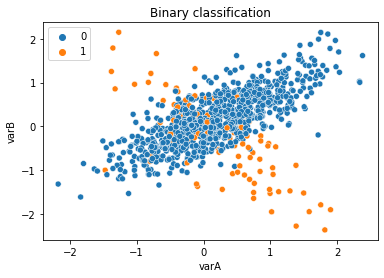

In [49]:
from sklearn.datasets import make_classification

def make_data(n_classes, weights, sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_classes=n_classes,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=weights,
                               class_sep=sep,  # các lớp phân tách thế nào
                               random_state=1)

    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

X, y = make_data(
    n_classes=2, # phân loại nhị phân
    weights=[0.90], # không cân bằng, 10:1
    sep=0.2, # khả năng phân tách lớp
)

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)
plt.title('Binary classification')
plt.show()

In [50]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4
)
X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)
y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()
    

(0    894
 1    106
 dtype: int64,
 0    894
 1    894
 dtype: int64,
 0    894
 1    894
 dtype: int64)

Text(0.5, 1.0, 'Borderline SMOTE variant 2')

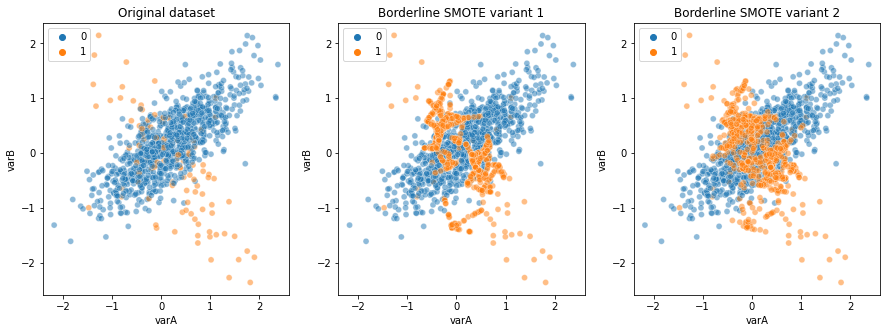

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax0 = sns.scatterplot(data=X, x="varA", y="varB", hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_res_b1, x="varA", y="varB", hue=y_res_b1, ax=ax[1], alpha=0.5)
ax1.set_title('Borderline SMOTE variant 1')
ax2 = sns.scatterplot(data=X_res_b2, x="varA", y="varB", hue=y_res_b2, ax=ax[2], alpha=0.5)
ax2.set_title('Borderline SMOTE variant 2')

# SVM-SMOTE

Tạo mẫu mới bằng cách nội suy các mẫu của vectơ hỗ trợ từ lớp thiểu số và các neighbour gần nhất của nó.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [53]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

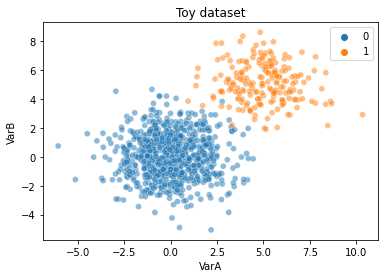

In [54]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Tìm vectơ hỗ trợ

In [56]:
# Khởi tạo bộ phân loại SVM
## Yêu cầu 15
## VIẾT CODE Ở ĐÂY:
clf = svm.SVC(kernel='linear')

# Khớp dữ liệu
clf = clf.fit(X, y)

# vectơ hỗ trợ, chỉ số 
clf.support_

array([ 99, 102, 217, 223, 482, 545, 688, 756, 826, 833, 844, 881, 979,
       987, 988], dtype=int32)

<details><summary> Gợi ý </summary>

[SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

</details>

In [57]:
# số lượng vectơ hỗ trợ
## Yêu cầu 16
## VIẾT CODE Ở ĐÂY:
len(clf.support_)

15

<details><summary> Gợi ý </summary>

Sử dụng ```support_```

</details>

In [58]:
# vectơ hỗ trợ
## Yêu cầu 17
## VIẾT CODE Ở ĐÂY:
clf.support_vectors_

array([[2.16820943, 2.90790734],
       [3.25087891, 2.06837263],
       [1.68519688, 3.15295353],
       [4.17266613, 1.96951314],
       [2.40463496, 2.90522039],
       [3.43891671, 1.88284678],
       [3.14751513, 2.55132497],
       [2.7714733 , 3.82423252],
       [3.30690458, 2.19532382],
       [5.05395026, 1.98807827],
       [1.72079133, 3.54280898],
       [0.93432261, 3.85581332],
       [2.73773657, 3.50825211],
       [5.13152106, 1.90461231],
       [3.15271887, 3.43761703]])

<details><summary> Gợi ý </summary>

Sử dụng ```support_vectors_```

</details>

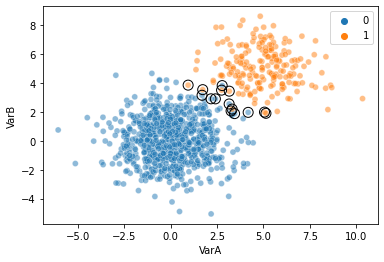

In [59]:
# đánh dấu các vectơ hỗ trợ

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

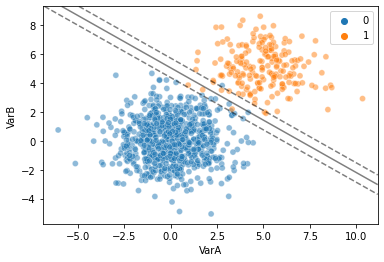

In [60]:
# vẽ biểu đồ ranh giới quyết định
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# thêm ranh giới quyết định
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## SVM SMOTE

[SVMSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [61]:
## Yêu cầu 18
## VIẾT CODE Ở ĐÂY:
sm = SVMSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=4,
    svm_estimator = svm.SVC(kernel='linear')
)

X_res, y_res = sm.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SVMSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

</details>

In [62]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [63]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [64]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

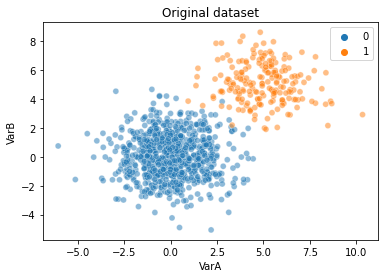

In [65]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 19
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

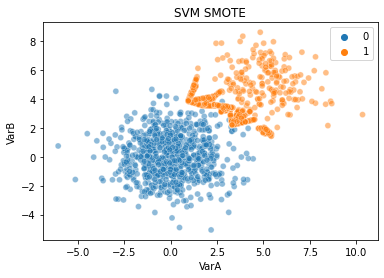

In [66]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 20
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

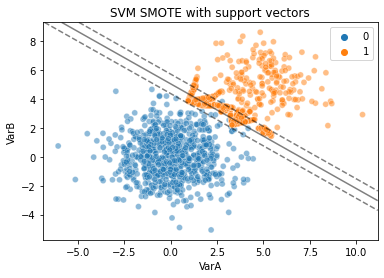

In [67]:
# biểu đồ dữ liệu đã chọn

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# thêm ranh giới quyết định
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()

Chúng ta thấy rằng đa số các mẫu tổng hợp được tạo gần hơn với các vectơ hỗ trợ từ lớp thiểu số.

**BÀI TẬP**

- Kiểm tra SVM SMOTE sử dụng tập dữ liệu giả lập mà chúng ta đã tạo và xem phân phối của dữ liệu mới tạo thay đổi thế nào với các phân tách lớp khác nhau.

Text(0.5, 1.0, 'SVM SMOTE')

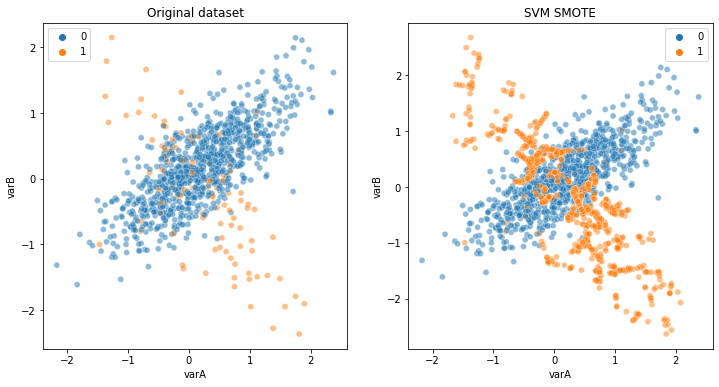

In [72]:
from sklearn.datasets import make_classification

def make_data(n_classes, weights, sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_classes=n_classes,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=weights,
                               class_sep=sep,  # các lớp phân tách thế nào
                               random_state=1)

    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

X, y = make_data(
    n_classes=2, # phân loại nhị phân
    weights=[0.90], # không cân bằng, 10:1
    sep=0.2, # khả năng phân tách lớp
)

sm = SVMSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=4,
    svm_estimator = svm.SVC(kernel='linear')
)

X_res, y_res = sm.fit_resample(X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax0 = sns.scatterplot(data=X, x="varA", y="varB", hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_res, x="varA", y="varB", hue=y_res, ax=ax[1], alpha=0.5)
ax1.set_title('SVM SMOTE')

# K-Means SMOTE

Tạo mẫu mới bằng cách nội suy các mẫu với SMOTE trong các cụm đã chọn.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from imblearn.over_sampling import KMeansSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [74]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (0,5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 2100

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# số mẫu trên blob khác nhau
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(400, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

# đặt lại index
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

             
# tạo mục tiêu mất cân bằng
y = pd.concat([
    pd.Series(np.random.binomial(1, 0.3, 700)),
    pd.Series(np.random.binomial(1, 0.2, 400)),
    pd.Series(np.random.binomial(1, 0.1, 100)),
], axis=0).reset_index(drop=True)

# hiển thị kích thước
X.shape, y.shape

((1200, 2), (1200,))

In [75]:
y.value_counts()

0    881
1    319
dtype: int64

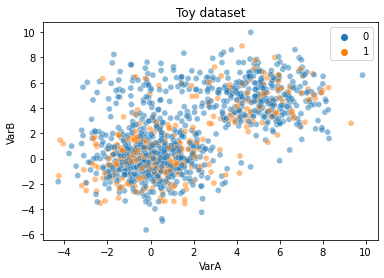

In [76]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## K-Means SMOTE

[KMeansSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

In [77]:
## Yêu cầu 21
## VIẾT CODE Ở ĐÂY:
sm = KMeansSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=2,
    n_jobs=None,
    kmeans_estimator=KMeans(n_clusters=3, random_state=0),
    cluster_balance_threshold=0.1,
    density_exponent='auto'
)

X_res, y_res = sm.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[KMeansSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

</details>

In [78]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1200, 2), (1200,))

In [79]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1764, 2), (1764,))

In [80]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    881
 1    319
 dtype: int64,
 1    883
 0    881
 dtype: int64)

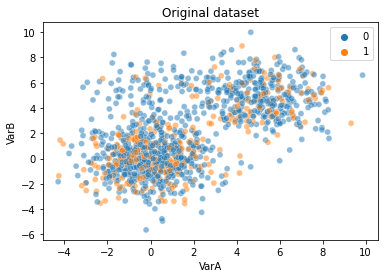

In [81]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 22
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

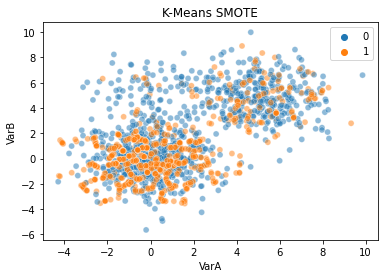

In [82]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 23
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('K-Means SMOTE')
plt.show()